In [ ]:
''' 
Author: Nik Alleyne
Author Blog: www.securitynik.com

In this post, I am continuing my learning of Gradient Descent and Backpropagation.

In this previous post: https://www.securitynik.com/2021/08/beginning-deep-learning-understanding.html
I started the process of learning about backpropagation.
This notebook was meant to further solidfy that learning while leveraging
the manual process along with Tensorflow's GradientTape and
PyTorch backward

'''

In [233]:
# import the PIL library for image processing
from PIL import Image

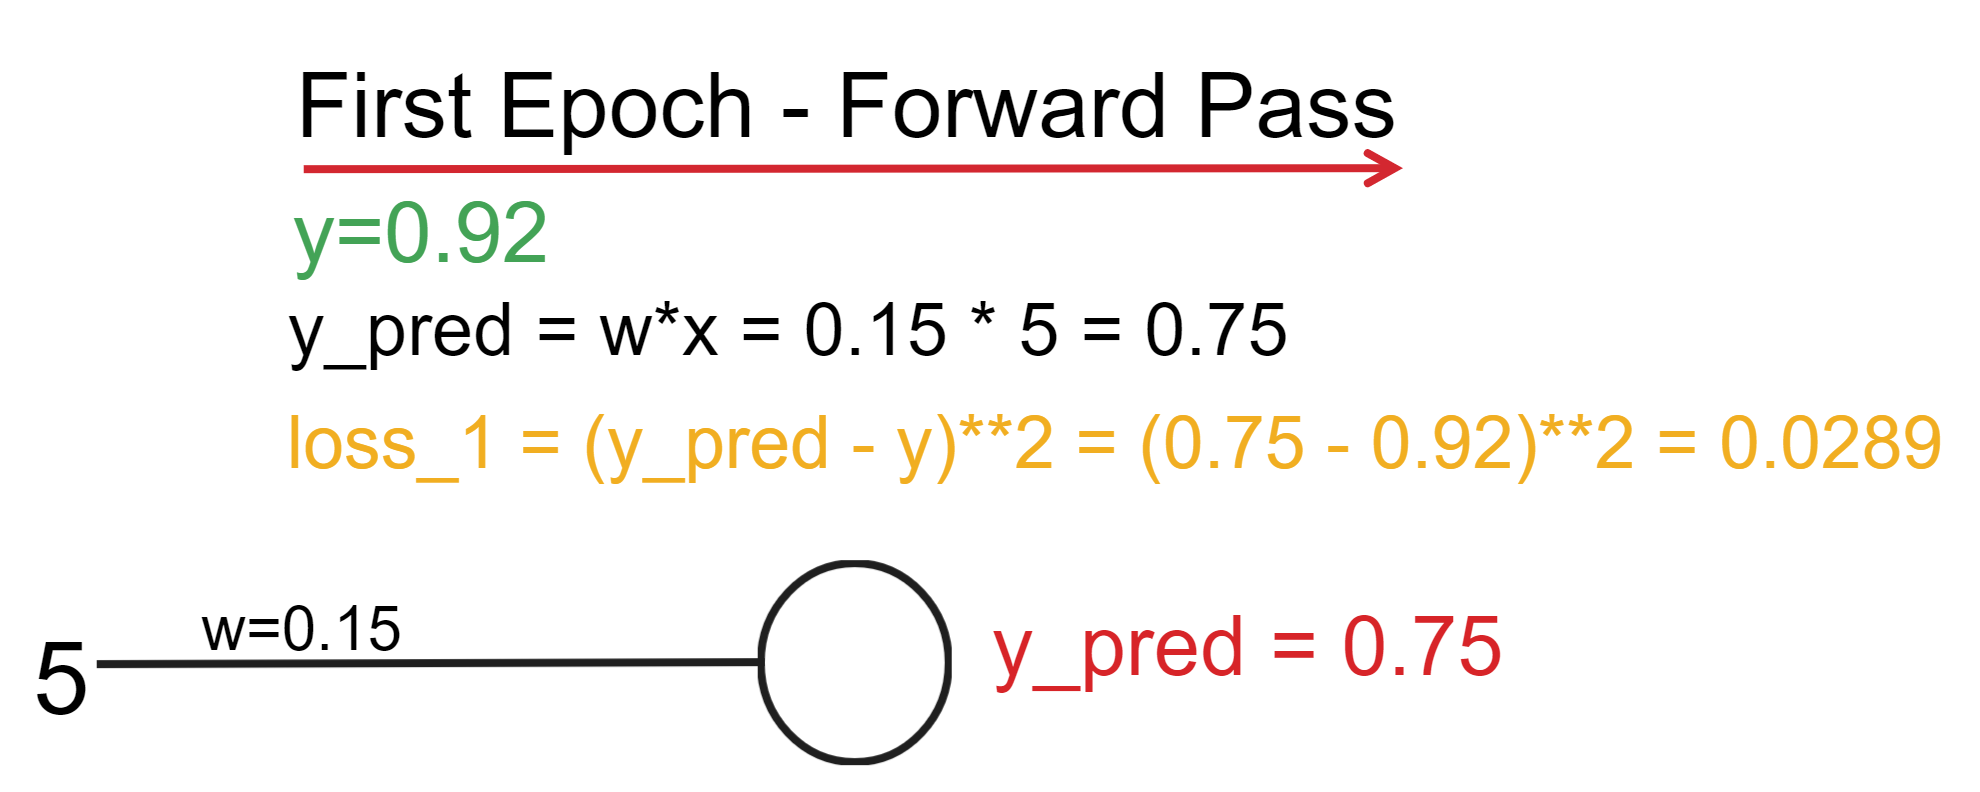

In [235]:
# Open the image showing the manual first epoch
# https://stackoverflow.com/questions/31666200/how-can-i-load-an-image-using-python-pillow
Image.open(fp='./Forward_Pass_Beginning_Gradient_Descent.png')

In [236]:
# Define the learning rate
learning_rate = 0.1

# Define my desired initial weight
init_weight = 0.15

# Define my x - feature
x = 5.

# define my y - target/label
y = 0.92

init_weight, x, y, learning_rate

(0.15, 5.0, 0.92, 0.1)

In [237]:
# Making a prediction manually
def forward_pass(w, x):
    ''' Make a forward pass on the training data '''
    return w*x

In [238]:
# Make a prediction
y_pred = forward_pass(init_weight, x)
y_pred

0.75

In [239]:
# Calculate the loss on this pass
# Because I have one sample, there is no need to devide by num of samples
# So I'm cheating here
def my_MSELoss(y_pred, y_true):
    ''' Calculates the Mean Squared Error Loss '''
    return (y_pred - y_true)**2

In [240]:
# Calculates the loss on this sample. 
# Similar to Stochastic Gradient Descent (SGD)
mseloss = my_MSELoss(y_pred, y)
mseloss

0.028900000000000012

In [ ]:
''' 
With the above done manually, let's confirm with both Tensorflow 
and PyTorch that we calculated the forward pass correctly
'''

In [241]:
# Import the needed libraries
import tensorflow as tf
import torch

In [242]:
# Setup Tensorflow to use my desired initial weight
# https://stackoverflow.com/questions/61373229/set-weights-in-tensorflow-model
tf_init_weight = tf.Variable(initial_value=[init_weight], trainable=True)
tf_init_weight

kernel_init = tf.keras.initializers.constant(tf_init_weight)
kernel_init

# Setup a simple Tensorflow model
model = tf.keras.Sequential(name='Basic_Sequential_Model')
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,), use_bias=False, kernel_initializer=kernel_init, name='simple_network'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss='mse')
model.get_weights(), model.summary()

Model: "Basic_Sequential_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_network (Dense)      (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


([array([[0.15]], dtype=float32)], None)

In [243]:
# Train the network
history = model.fit(x=tf.constant(value=[[x]], name='x_feature') , y=tf.constant(value=[y], name='y_target'), epochs=1)

tf_loss = history.history['loss']
tf_loss

1/1 [==============================] - 0s 395ms/step - loss: 0.0289


[0.02890000492334366]

In [244]:
# Confirmikng the same with PyTorch
# https://medium.com/codex/how-to-build-a-pytorch-model-42ae8473a41e
# https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

class SimpleModel(torch.nn.Module):
    ''' Subclass the torch module '''
    def __init__(self):
        super(SimpleModel, self).__init__()

        # Define a layer with 1 input feature and one output target
        # Turn off the bias
        self.linear = torch.nn.Linear(in_features=1, out_features=1, bias=None)

    # Setup the forward pass
    def forward(self, x):
        return self.linear(x)

In [251]:
# Instantitate the model
simple_model = SimpleModel()

# Add the losss function
loss = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(simple_model.parameters(), lr=0.1)

# Setup the weights I would like to use
# https://www.askpython.com/python-modules/initialize-model-weights-pytorch
torch.nn.init.constant_(simple_model.linear.weight, init_weight)

Parameter containing:
tensor([[0.1500]], requires_grad=True)

In [252]:
print(simple_model)

SimpleModel(
  (linear): Linear(in_features=1, out_features=1, bias=False)
)


In [253]:
# Define the x and y data
torch_x = torch.tensor(data=[[x]], dtype=torch.float32)
torch_y = torch.tensor(data=[y], dtype=torch.float32)

# Print x and y
torch_x, torch_y

(tensor([[5.]]), tensor([0.9200]))

In [254]:
# Setup a list to store the losses
torch_loss = []

# Train the model for one epoch
for i in range(0, 1):
    y_pred = simple_model(torch_x)
    loss = loss(y_pred, torch_y)

    # Clear the gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    torch_loss.append(loss.item())
    print(f'Epoch {i}: loss: {loss.item()}')

Epoch 0: loss: 0.02890000492334366


In [257]:
''' Awesome, I have confirmed with both Tensorflow and PyTorch that 
the manual calculations for the first epoch (forward pass) was correct.
Time to move on to Gradient Descent via Backpropagation'''

' Awesome, I have confirmed with both Tensorflow and PyTorch that \nthe manual calculations for the first epoch (forward pass) was correct.\nTime to move on to Gradient Descent via Backpropagation'

In [256]:
# First up, time to calculate the gradients 
# by leveraging Backpropagation and the chain rule

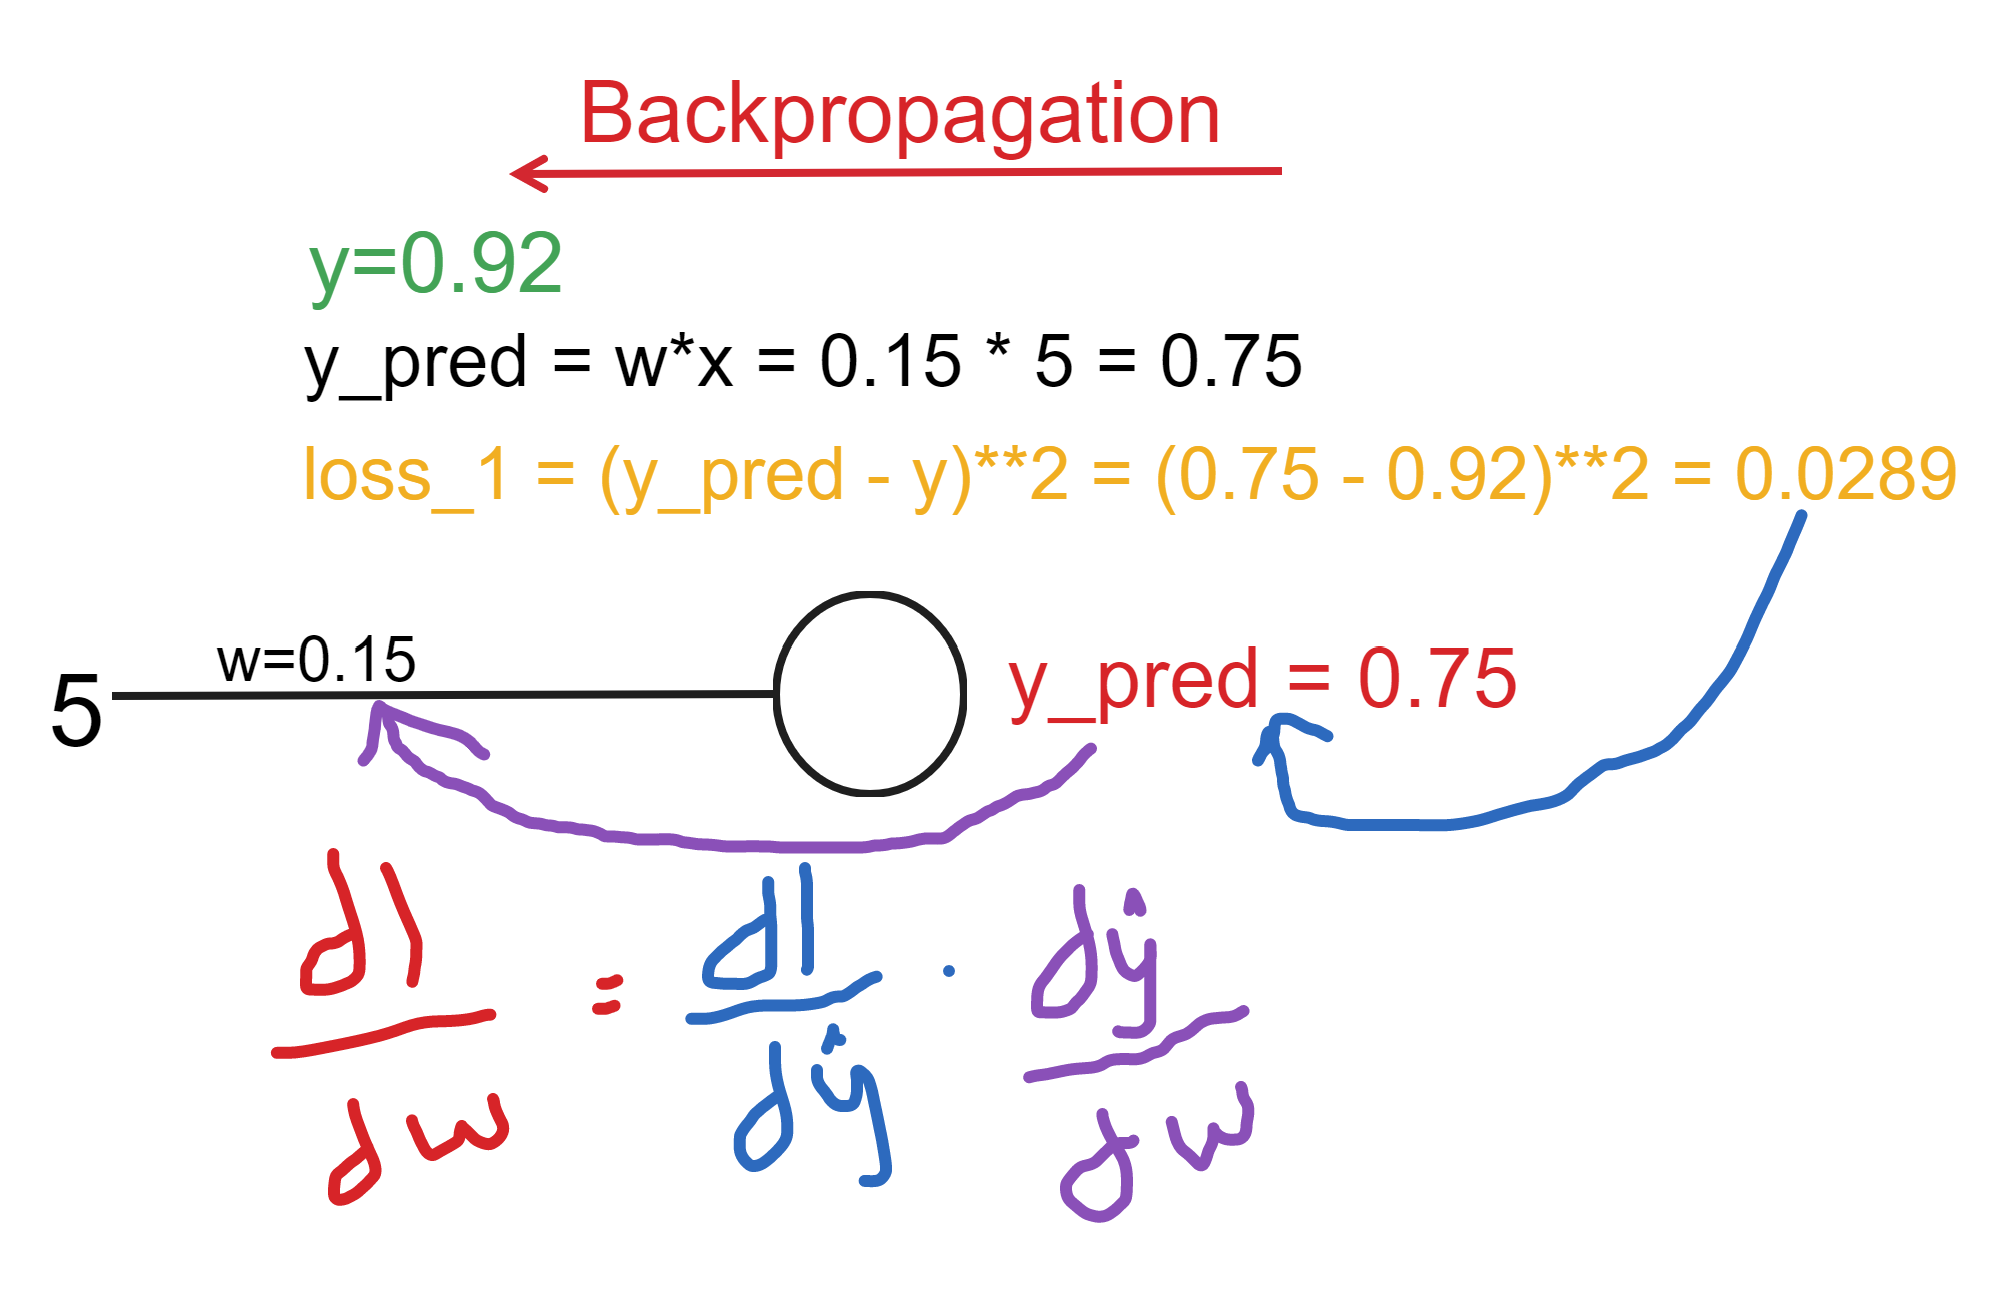

In [258]:
# Load the backpropagation image
Image.open(fp='./Backward_Pass_Beginning_Gradient_Descent.png')

In [ ]:
''' 
To calculate the gradients, I need to find the partial derivatives
of the loss with respect to the weight. Meaning as the weight changes.,
how does the loss changes.

However, when the weight is changed, the prediction will be changed.
When the prediction changes, the loss changes.
Hence, I need to find the partial derivative 
of the loss with respect to the prediction.
And the derivative of the prediction with respect to the weights.
The chain rule can be used to solve this challenge

dl_dw = dl_dy * dy_dw
'''

In [259]:
# First finding dl_dy - partial derivative of the loss with respect to the prediction
# mse loss = (y_pred-y_true) ** 2
# To find the partial derivative of the loss with respect to the prediction
# it is 2(y_pred - y_true)
dl_dy = 2*(0.75-0.92)
dl_dy

-0.3400000000000001

In [260]:
# Next up, find the partial derivative of 
# the prediction with respect to the weight
# formula for the prediction is y_hat = w*x
# hence the partial derivative of dy_dw = x
dy_dw = x
dy_dw

5.0

In [261]:
# hence dl_dw = dl_dy * dy_dw
dl_dw = dl_dy * dy_dw
dl_dw

-1.7000000000000004

In [262]:
# Now that the gradient has been calculated, time to update the weight
# To update the weight, the formula is
# new_weight_0 = old_weight_0 - learning_rate * dl_dw
new_weight = init_weight - learning_rate*(dl_dw)
new_weight

0.32000000000000006

In [263]:
# Using the new weight to train the network
y_pred = forward_pass(new_weight, x)
y_pred

1.6000000000000003

In [264]:
# Calculate the loss
my_MSELoss(y_pred, y)

0.46240000000000037

In [265]:
# Obviously, the process above should be done via a loop, 
# rather than individually
# Before coding this up, time to verify with tensorflow and PyTorch
# that the gradients are the same

In [267]:
# First, Tensorflow's automatic differentation
# https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22
# https://www.tensorflow.org/guide/autodiff
def tf_get_gradients(x, w, y_true):
    ''' calculates the gradients '''
    w = tf.Variable(initial_value=[init_weight], trainable=True, name='init_weight')
    x = tf.constant(value=[x], name='input_data')

    with tf.GradientTape() as tape:
        y_pred = forward_pass(w, x)
        loss = tf.keras.losses.mse(y_true=y_true, y_pred=y_pred)
    
    dl_dw = tape.gradient(loss, w)
    return (y_pred, loss, dl_dw)

In [268]:
# Get the gradient 
# These confirm the same findings done above manually
tf_get_gradients(x, init_weight, y)

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.75], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.028900005>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.7000002], dtype=float32)>)

In [269]:
''' 
With the tensorflow gradient calculated 
for the loss with respect to the weight
time to use PyTorch
'''


' \nWith the tensorflow gradient calculated \nfor the loss with respect to the weight\ntime to use PyTorch\n'

In [270]:
# Define a function to calculate the gradients with PyTorch
# https://pytorch.org/docs/stable/tensors.html#torch.Tensor.backward
# https://pytorch.org/tutorials/intermediate/custom_function_double_backward_tutorial.html 
def torch_get_gradient(x, w, y_true):
    # instantiate the loss function
    loss = torch.nn.MSELoss()
    x = x.clone().detach()

    # Set the weight tensor as require_gradient
    w = torch.tensor(w, dtype=torch.float32, requires_grad=True)

    # make a prediction
    y_hat = torch.multiply(w, x)

    # Calculate the loss
    torch_loss = loss(y_hat, y_true)

    # Perform backpropagation
    torch_loss.backward()

    return (y_hat, torch_loss, w.grad)

In [271]:
# Get the gradients from torch
torch_get_gradient(torch_x, init_weight, torch_y)

(tensor([[0.7500]], grad_fn=<MulBackward0>),
 tensor(0.0289, grad_fn=<MseLossBackward0>),
 tensor(-1.7000))

In [272]:
# I have confirmed the gradients using 3 methods. 
# 1. Manual, 2, Tensorflow Gradient Tape 3. PyTorch backward
# I also updated the weights and made a second pass,
# Let's confirm this with TensorFlow again
# This time 2 epochs

tf_init_weight = tf.Variable(initial_value=[init_weight], trainable=True)
tf_init_weight

kernel_init = tf.keras.initializers.constant(tf_init_weight)
kernel_init

# Setup a simple Tensorflow model
model = tf.keras.Sequential(name='Basic_Sequential_Model')
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,), use_bias=False, kernel_initializer=kernel_init, name='simple_network'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')
# model.get_weights(), model.summary()
history = model.fit(x=tf.constant(value=[[x]], name='x_feature') , y=tf.constant(value=[y], name='y_target'), epochs=2)

tf_loss = history.history['loss']
tf_loss

Epoch 1/2
1/1 [==============================] - 1s 551ms/step - loss: 0.0289
Epoch 2/2
1/1 [==============================] - 0s 23ms/step - loss: 0.4624


[0.02890000492334366, 0.4624001681804657]

In [273]:
# Above confirms just what was gotten from the 
# manual updating of the weights

In [274]:
# Confirming with PyTorch

class SimpleModel(torch.nn.Module):
    ''' Subclass the torch module '''
    def __init__(self):
        super(SimpleModel, self).__init__()

        # Define a layer with 1 input feature and one output target
        # Turn off the bias
        self.linear = torch.nn.Linear(in_features=1, out_features=1, bias=None)

    # Setup the forward pass
    def forward(self, x):
        return self.linear(x)


simple_model = SimpleModel()
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(simple_model.parameters(), lr=0.1)
torch.nn.init.constant_(simple_model.linear.weight, init_weight)
torch_x = torch.tensor(data=[[x]], dtype=torch.float32)
torch_y = torch.tensor(data=[y], dtype=torch.float32)

torch_loss = []

# Train the model for two epochs
for i in range(0, 2):
    y_pred = simple_model(torch_x)
    loss = my_MSELoss(y_pred, torch_y)

    # Clear the gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    torch_loss.append(loss.item())
    print(f'Epoch {i}: loss: {loss.item()}')


Epoch 0: loss: 0.02890000492334366
Epoch 1: loss: 0.4624001681804657


In [275]:
# This also confirms the manual process and the TensorFlow GradientTape 
# Time to now code up my own and close this post off.
# Quick and dirty just for this purpose
def my_gradient(w, x, y):
    for i in range(0, 2):
        y_pred = forward_pass(w, x)
        loss = (y_pred - y) ** 2
        dl_dw = 2*(y_pred - y) * x
        w = w - 0.1 *(dl_dw)
        print(f'Epoch: {i}: Prediction: {y_pred} : Loss:{loss}' )

    return y_pred, loss

In [276]:
my_gradient(init_weight, x, y)

Epoch: 0: Prediction: 0.75 : Loss:0.028900000000000012
Epoch: 1: Prediction: 1.6000000000000003 : Loss:0.46240000000000037


(1.6000000000000003, 0.46240000000000037)

In [ ]:
# That's it for this post